In [111]:
# Data manipulation & vizualisation tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler, OneHotEncoder
from sklearn.model_selection import RepeatedKFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [44]:
cookies = pd.read_excel('cookies_comp_students.xlsx')

In [72]:
cookies_test = pd.read_excel('cookies_comp_students.xlsx', 'cookies_test')

In [45]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [46]:
cookies.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,5198.000000,5193.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5188.000000,5198.000000,5198.000000,5198.0,5198.000000,5198.000000
mean,0.318049,5.402465,559.638322,30.390246,115.015294,0.995819,8.222020,0.530864,10.494758,7.325125,14.381935,7.0,1.499367,3.000577
std,0.150036,4.668342,353.274062,17.268403,56.506171,0.062193,0.283323,0.150886,1.194584,1.302780,3.023740,0.0,0.289205,0.024019
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,7.0,1.000000,3.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,7.0,1.250000,3.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.505000,10.300000,8.000000,14.000000,7.0,1.500000,3.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996907,8.320000,0.600000,11.300000,8.000000,15.400000,7.0,1.750000,3.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,7.0,2.000000,4.000000


In [47]:
cookies.dropna(inplace=True)

In [48]:
cookies.columns = cookies.columns.str.replace(' ', '_')

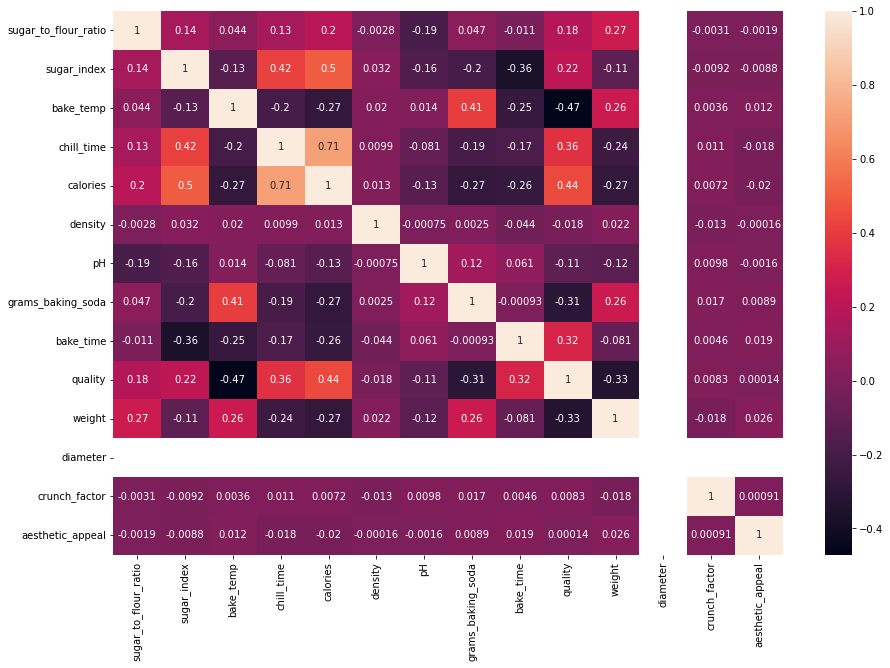

In [49]:
corr_map = cookies.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_map, annot=True);

In [50]:
# calories
cookies.query('calories < 0')

,sugar_to_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,grams_baking_soda,bake_time,quality,butter_type,weight,diameter,mixins,crunch_factor,aesthetic_appeal
22,0.28,14.7,510,29.0,-99.0,0.99792,7.96,0.39,9.0,9,melted,14.0,7,"chocolate, oats",1.08,3
200,0.37,1.0,380,6.0,-99.0,0.99020,8.37,0.34,11.4,7,melted,11.2,7,raisins,1.67,3
906,0.26,2.1,830,17.0,-99.0,0.99616,8.29,0.56,9.8,6,cubed,14.8,7,"nuts, oats, chocolate",1.65,3
3099,0.17,12.0,460,65.0,-99.0,0.99760,8.15,0.38,9.0,8,melted,12.0,7,raisins,1.33,3
4428,0.26,9.7,300,39.0,-99.0,0.99080,8.08,0.56,12.9,9,melted,12.4,7,chocolate,1.82,3


In [51]:
cookies = cookies[cookies.calories > 0]

In [52]:
cookies[cookies.pH > 14]
cookies.drop(18, inplace=True)

In [53]:
cookies[cookies.weight < 0]
cookies.drop(1783, inplace=True)

In [54]:
cookies.diameter.unique()

array([7])

In [55]:
cookies.drop('diameter', axis=1, inplace=True)

In [56]:
cookies.drop('aesthetic_appeal', axis=1, inplace=True)

In [57]:
cookies.query('density > 1.1')

,sugar_to_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,grams_baking_soda,bake_time,quality,butter_type,weight,mixins,crunch_factor
3990,0.24,6.8,570,41.0,163.0,5.0,8.2,0.41,9.9,8,melted,14.6,"nuts, chocolate",1.24


In [58]:
cookies.drop(3990, inplace=True)

In [59]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 0 to 5197
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar_to_flour_ratio  5171 non-null   float64
 1   sugar_index           5171 non-null   float64
 2   bake_temp             5171 non-null   int64  
 3   chill_time            5171 non-null   float64
 4   calories              5171 non-null   float64
 5   density               5171 non-null   float64
 6   pH                    5171 non-null   float64
 7   grams_baking_soda     5171 non-null   float64
 8   bake_time             5171 non-null   float64
 9   quality               5171 non-null   int64  
 10  butter_type           5171 non-null   object 
 11  weight                5171 non-null   float64
 12  mixins                5171 non-null   object 
 13  crunch_factor         5171 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 606.0+ KB


In [60]:
cookies.describe()

,sugar_to_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,grams_baking_soda,bake_time,quality,weight,crunch_factor
count,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000
mean,0.318271,5.399130,559.597757,30.379037,115.261748,0.994662,8.218704,0.531095,10.496462,7.325082,14.407291,1.498898
std,0.149878,4.668799,353.522250,17.248637,56.078776,0.002936,0.161540,0.151036,1.194776,1.302322,2.585812,0.289299
min,0.000000,0.600000,90.000000,0.000000,6.000000,0.987110,7.720000,0.220000,8.000000,3.000000,7.600000,1.000000
25%,0.240000,1.800000,380.000000,17.000000,77.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,1.250000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.300000,8.000000,14.000000,1.500000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996900,8.320000,0.600000,11.300000,8.000000,15.400000,1.750000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,1.010300,9.010000,2.000000,14.900000,11.000000,31.800000,2.000000


In [65]:
a = cookies[(cookies['sugar_to_flour_ratio'] > 1) & (cookies['sugar_index'] < 5)].index

In [66]:
cookies.drop(a, axis=0, inplace=True)

In [67]:
cookies.describe()

,sugar_to_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,grams_baking_soda,bake_time,quality,weight,crunch_factor
count,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000,5168.000000
mean,0.317316,5.400735,559.732972,30.374420,115.228425,0.994663,8.218777,0.531124,10.495840,7.324690,14.407334,1.498988
std,0.143437,4.669550,353.575130,17.251184,56.039865,0.002935,0.161533,0.151070,1.194241,1.302598,2.586459,0.289203
min,0.000000,0.600000,90.000000,0.000000,6.000000,0.987110,7.720000,0.220000,8.000000,3.000000,7.600000,1.000000
25%,0.240000,1.800000,380.000000,17.000000,77.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,1.250000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.300000,8.000000,14.000000,1.500000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996903,8.320000,0.600000,11.300000,8.000000,15.400000,1.750000
max,1.000000,31.600000,6110.000000,146.500000,366.500000,1.010300,9.010000,2.000000,14.900000,11.000000,31.800000,2.000000


In [73]:
cookies_test.describe()

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.0,779.000000,779.0,779.000000,779.0
mean,1390.000000,0.322555,6.384531,480.423620,34.296534,129.188062,0.994293,8.196264,0.513504,10.614925,0.0,14.015404,7.0,1.491130,3.0
std,225.022221,0.120214,5.520385,225.928988,20.170179,50.679340,0.003502,0.153041,0.131211,1.234559,0.0,2.269722,0.0,0.282746,0.0
min,1001.000000,0.000000,0.600000,120.000000,2.000000,8.000000,0.987460,7.790000,0.230000,8.500000,0.0,9.400000,7.0,1.000000,3.0
25%,1195.500000,0.260000,1.900000,360.000000,21.000000,98.000000,0.991710,8.090000,0.420000,9.500000,0.0,12.600000,7.0,1.255000,3.0
50%,1390.000000,0.310000,4.800000,430.000000,33.000000,128.000000,0.994200,8.180000,0.500000,10.500000,0.0,13.600000,7.0,1.490000,3.0
75%,1584.500000,0.370000,10.000000,520.000000,45.000000,162.000000,0.996645,8.290000,0.580000,11.500000,0.0,14.800000,7.0,1.730000,3.0
max,1779.000000,1.000000,65.800000,2140.000000,289.000000,440.000000,1.038980,8.760000,1.180000,14.200000,0.0,27.600000,7.0,2.000000,3.0


In [82]:
cookies.describe()

,sugar_to_flour_ratio,sugar_index,bake_temp,chill_time,calories,density,pH,grams_baking_soda,bake_time,quality,weight,crunch_factor
count,5143.000000,5143.000000,5143.000000,5143.000000,5143.000000,5143.000000,5143.000000,5143.000000,5143.000000,5143.000000,5143.000000,5143.000000
mean,0.316467,5.412366,543.987945,30.439627,115.430391,0.994652,8.219588,0.528316,10.501070,7.333463,14.396831,1.498866
std,0.142660,4.672888,265.530266,17.260891,55.993606,0.002937,0.161342,0.143963,1.194446,1.298288,2.585629,0.289063
min,0.000000,0.600000,90.000000,0.000000,6.000000,0.987110,7.720000,0.220000,8.000000,3.000000,7.600000,1.000000
25%,0.240000,1.800000,380.000000,17.000000,77.750000,0.992295,8.110000,0.430000,9.500000,7.000000,12.800000,1.250000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.500000,10.300000,8.000000,14.000000,1.500000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996900,8.320000,0.600000,11.300000,8.000000,15.400000,1.750000
max,1.000000,31.600000,2500.000000,146.500000,366.500000,1.010300,9.010000,1.980000,14.900000,11.000000,31.800000,2.000000


In [77]:
b = cookies[cookies['bake_temp'] > 2500].index

In [79]:
cookies.drop(b, axis=0, inplace=True)

In [80]:
cookies.reset_index(drop=True, inplace=True)

In [81]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar_to_flour_ratio  5143 non-null   float64
 1   sugar_index           5143 non-null   float64
 2   bake_temp             5143 non-null   int64  
 3   chill_time            5143 non-null   float64
 4   calories              5143 non-null   float64
 5   density               5143 non-null   float64
 6   pH                    5143 non-null   float64
 7   grams_baking_soda     5143 non-null   float64
 8   bake_time             5143 non-null   float64
 9   quality               5143 non-null   int64  
 10  butter_type           5143 non-null   object 
 11  weight                5143 non-null   float64
 12  mixins                5143 non-null   object 
 13  crunch_factor         5143 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 562.6+ KB


In [83]:
cookies.to_csv("clean_cookies.csv")

# Modeling

In [98]:
y = cookies['quality']
X = cookies.drop(['quality'], axis=1)

In [101]:
X_cat = X.select_dtypes(object)
X_num = X.select_dtypes(np.number)

In [102]:
encoder = OneHotEncoder(drop='first').fit(X_cat)
X_cat_encoded = encoder.transform(X_cat).toarray()
X_encoded_cols = encoder.get_feature_names_out(X_cat.columns) # recovering names
X_cat_en_df = pd.DataFrame(X_cat_encoded, columns=X_encoded_cols)

In [103]:
scaler = Normalizer().fit(X_num)

In [104]:
X_num_sc = scaler.transform(X_num)

In [105]:
X_num_sc_names = scaler.feature_names_in_

In [106]:
X_num_sc_df = pd.DataFrame(X_num_sc, columns=X_num_sc_names)

In [107]:
X_full = pd.concat([X_num_sc_df, X_cat_en_df], axis=1)

In [108]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   sugar_to_flour_ratio                   5143 non-null   float64
 1   sugar_index                            5143 non-null   float64
 2   bake_temp                              5143 non-null   float64
 3   chill_time                             5143 non-null   float64
 4   calories                               5143 non-null   float64
 5   density                                5143 non-null   float64
 6   pH                                     5143 non-null   float64
 7   grams_baking_soda                      5143 non-null   float64
 8   bake_time                              5143 non-null   float64
 9   weight                                 5143 non-null   float64
 10  crunch_factor                          5143 non-null   float64
 11  butt

In [128]:
X_full = pd.concat([X_cat_en_df, X_num],axis=1)

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X_full, y, test_size=0.3, random_state=42)

In [131]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [133]:
cross_val_scores = cross_val_score(rfr, X_train, y_train)
cross_val_scores

array([0.74155055, 0.75151828, 0.72578269, 0.75701126, 0.73914633])

In [145]:
feature_importances = rfr.feature_importances_
feature_names = X_full.columns
forest_importances = pd.Series(feature_importances, index=feature_names)
forest_importances.sort_values(ascending=False).head(12)

butter_type_melted      0.558147
bake_time               0.111787
chill_time              0.047964
grams_baking_soda       0.034814
calories                0.033310
pH                      0.033293
sugar_to_flour_ratio    0.029466
sugar_index             0.028907
density                 0.027276
bake_temp               0.025654
weight                  0.023820
crunch_factor           0.020152
dtype: float64

In [169]:
best_model = ()
for i in range(1, 26):
    a = forest_importances.sort_values(ascending=False).head(i).index
    X_full_1 = X_full[a]
    X_train,X_test,y_train,y_test = train_test_split(X_full_1, y, test_size=0.3, random_state=42)
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    cross_val_scores = cross_val_score(rfr, X_train, y_train)
    if len(best_model) == 0:
        best_model = (i, cross_val_scores.mean(), cross_val_scores.std())
    else:
        if cross_val_scores.mean() > best_model[1]:
            best_model = (i, cross_val_scores.mean(), cross_val_scores.std())

In [170]:
best_model

(11, 0.7448063455757675, 0.010643873528286414)

In [164]:
a = forest_importances.sort_values(ascending=False).head(11).index

In [165]:
X_full_1 = X_full[a]

In [166]:
X_train,X_test,y_train,y_test = train_test_split(X_full_1, y, test_size=0.3, random_state=42)

In [167]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [171]:
cross_val_scores = cross_val_score(rfr, X_train, y_train)
cross_val_scores.mean()

0.7436353218407559

In [179]:
c = cookies['mixins'].unique()

In [180]:
d = cookies_test['mixins'].unique()

In [181]:
list(set(c).symmetric_difference(set(d)))

['peanut butter, raisins', 'oats']